In [1]:
%run auxStandardStructure.ipynb

Using TensorFlow backend.


In [2]:
import tensorflow as tf
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

No GPU found


## Preprocessing

In [3]:
all_releases_df = pd.read_csv('raw_data.csv')

In [4]:
X, y = generateStandardTimeSeriesStructure(all_releases_df, 4)

Generating a new dataframe without containing the last release...
... DONE!
checking class larger than window size...
DONE
Setting the features...
DONE
X: (3370, 32) y: (3370,)


In [5]:
print("Declaring a dictionary to save results...")
results_dict = dict()
print("... DONE!")

print("Splitting dataset into train and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print("General information:")
print("X Train set:", X_train.shape[0], "X Test set:", X_test.shape[0])
print("y Train set:", y_train.shape[0], "y Test set:", y_test.shape[0])
print("... DONE!")

print("Scaling features...")
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.fit_transform(X_test))
print("... DONE!")

print("Setting stratified k-fold...")
k=5
kf = StratifiedKFold(n_splits=k, shuffle=False, random_state=42)
print("k =", k)
print("... DONE!\n")

Declaring a dictionary to save results...
... DONE!
Splitting dataset into train and test sets...
General information:
X Train set: 2359 X Test set: 1011
y Train set: 2359 y Test set: 1011
... DONE!
Scaling features...
... DONE!
Setting stratified k-fold...
k = 5
... DONE!



In [6]:
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

## Statistical Analysis

In [7]:
all_releases_df.describe()

,instanceID,Path,releaseID,CountClassCoupled,SumCyclomatic,MaxInheritanceTree,PercentLackOfCohesion,CountLineCode,CountClassDerived,CountDeclMethodAll,CountDeclMethod,class_frequency,number_of_changes,will_change,change_probability
count,11576.000000,1.157600e+04,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000,11576.000000
mean,5788.500000,9.148070e+18,4.980736,5.731513,12.279976,0.737474,0.143208,25.408431,0.445836,7.048981,1.235228,3.253455,0.074724,0.027039,0.016102
std,3341.847693,5.334891e+18,2.099896,9.568403,22.150706,1.602837,0.267863,66.493345,5.198372,18.958755,3.239050,1.767779,0.330764,0.162203,0.071078
min,1.000000,1.733956e+15,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2894.750000,4.535835e+18,3.000000,0.000000,3.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,5788.500000,9.219503e+18,5.000000,3.000000,7.000000,0.000000,0.000000,9.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
75%,8682.250000,1.373644e+19,7.000000,7.000000,13.000000,0.000000,0.000000,21.000000,0.000000,6.000000,1.000000,5.000000,0.000000,0.000000,0.000000
max,11576.000000,1.843342e+19,8.000000,162.000000,488.000000,7.000000,1.000000,1369.000000,189.000000,413.000000,56.000000,8.000000,5.000000,1.000000,0.800000


0
False    2254
True      105
Name: 0, dtype: int64

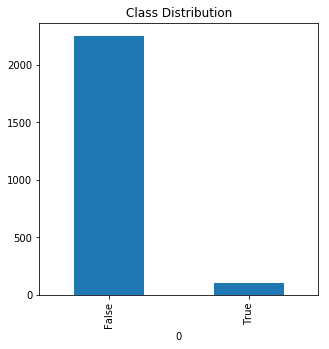

In [8]:
ax = y_train.groupby([0])[0].count().plot.bar(title="Class Distribution", figsize=(5,5))
y_train.groupby([0])[0].count()

In [9]:
X_train.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.0,-0.035,0.41,0.88,0.47,0.35,0.14,0.28,0.98,-0.012,0.41,0.87,0.47,0.35,0.14,0.28,0.98,-0.011,0.24,0.87,0.46,0.34,0.13,0.27,0.98,-0.0095,0.2,0.87,0.46,0.34,0.13,0.27
1,-0.035,1.0,-0.014,-0.081,0.028,0.087,0.04,0.087,0.0024,0.95,-0.014,-0.042,0.029,0.096,0.04,0.086,0.005,0.95,0.01,-0.04,0.028,0.1,0.037,0.086,0.0063,0.94,0.016,-0.039,0.029,0.1,0.037,0.086
2,0.41,-0.014,1.0,0.47,0.51,-0.059,0.26,0.31,0.43,-0.037,1.0,0.49,0.51,-0.053,0.26,0.31,0.43,-0.04,0.65,0.49,0.51,-0.05,0.25,0.32,0.43,-0.041,0.63,0.49,0.51,-0.05,0.25,0.32
3,0.88,-0.081,0.47,1.0,0.52,0.3,0.22,0.29,0.87,-0.061,0.47,0.99,0.52,0.3,0.21,0.29,0.87,-0.063,0.27,0.99,0.51,0.3,0.21,0.28,0.87,-0.063,0.23,0.98,0.51,0.3,0.21,0.28
4,0.47,0.028,0.51,0.52,1.0,-0.0068,0.33,0.83,0.49,0.016,0.51,0.53,0.99,-0.0016,0.33,0.82,0.48,0.018,0.31,0.53,0.99,-3.7e-05,0.33,0.82,0.48,0.02,0.29,0.53,0.98,-3.7e-05,0.33,0.82
5,0.35,0.087,-0.059,0.3,-0.0068,1.0,0.064,0.051,0.34,0.098,-0.06,0.3,-0.0058,0.99,0.065,0.051,0.34,0.095,-0.05,0.3,-0.0065,0.99,0.065,0.047,0.35,0.094,-0.06,0.3,-0.0042,0.99,0.063,0.048
6,0.14,0.04,0.26,0.22,0.33,0.064,1.0,0.36,0.14,0.038,0.26,0.22,0.33,0.067,1.0,0.35,0.14,0.046,0.12,0.22,0.33,0.068,0.99,0.35,0.14,0.05,0.096,0.22,0.33,0.068,0.99,0.36
7,0.28,0.087,0.31,0.29,0.83,0.051,0.36,1.0,0.29,0.08,0.31,0.3,0.82,0.056,0.35,0.99,0.29,0.082,0.18,0.3,0.82,0.058,0.35,0.99,0.29,0.084,0.15,0.3,0.82,0.058,0.36,0.98
8,0.98,0.0024,0.43,0.87,0.49,0.34,0.14,0.29,1.0,-0.0095,0.43,0.88,0.48,0.35,0.14,0.29,1.0,-0.0082,0.26,0.88,0.48,0.35,0.13,0.28,1.0,-0.0069,0.22,0.88,0.47,0.35,0.13,0.28
9,-0.012,0.95,-0.037,-0.061,0.016,0.098,0.038,0.08,-0.0095,1.0,-0.037,-0.058,0.017,0.1,0.038,0.079,-0.0093,0.99,-0.02,-0.058,0.016,0.1,0.038,0.078,-0.0084,0.99,-0.015,-0.057,0.017,0.1,0.038,0.077


## Imbalanced baseline

In [10]:
%%time
LogisticRegr_(X_train, y_train, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.8304825256044768
2 of KFold 5
ROC AUC score: 0.6842994403970013
3 of KFold 5
ROC AUC score: 0.7507654946679337
4 of KFold 5
ROC AUC score: 0.8116355189525921
5 of KFold 5
ROC AUC score: 0.6298412698412699

CROSS VALIDANTION SUMMARY:
Mean: 0.7414048498926548
Std deviation: 0.07571295932003182

TEST SET:
F1-Score(micro): 0.8001978239366964
F1-Score(macro): 0.5452355078918303
F1-Score(weighted): 0.8588021079417248
F1-Score(None): [0.88574661 0.20472441]
Accuracy: 0.8001978239366964
Sensitivity: 0.65
Specificity: 0.8063851699279093
Confusion Matrix: [0.8063851699279093, 0.65]
ROC AUC score: 0.7281925849639547
CPU times: user 330 ms, sys: 283 ms, total: 613 ms
Wall time: 97.7 ms


In [11]:
%%time
DecisionTree_(X_train, y_train, X_test, y_test)

CPU times: user 12 µs, sys: 1e+03 ns, total: 13 µs
Wall time: 3.81 µs

DECISION TREE
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.4960933375567522
2 of KFold 5
ROC AUC score: 0.5232288037166086
3 of KFold 5
ROC AUC score: 0.6727378312744166
4 of KFold 5
ROC AUC score: 0.5630873191848801
5 of KFold 5
ROC AUC score: 0.5331746031746032

CROSS VALIDANTION SUMMARY:
Mean: 0.5576643789814522
Std deviation: 0.061396838368247685

TEST SET:
F1-Score(micro): 0.9327398615232443
F1-Score(macro): 0.6128182022978148
F1-Score(weighted): 0.936917293417374
F1-Score(None): [0.96476684 0.26086957]
Accuracy: 0.9327398615232443
Sensitivity: 0.3
Specificity: 0.9588053553038105
Confusion Matrix: [0.9588053553038105, 0.3]
ROC AUC score: 0.6294026776519053
CPU times: user 211 ms, sys: 134 ms, total: 345 ms
Wall time: 51.5 ms


In [12]:
%%time
RandomForest_(X_train, y_train, X_test, y_test)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 3.58 µs
RANDOM FOREST
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5332066307676064
2 of KFold 5
ROC AUC score: 0.5343152782177173
3 of KFold 5
ROC AUC score: 0.565885334178017
4 of KFold 5
ROC AUC score: 0.5060711646077499
5 of KFold 5
ROC AUC score: 0.5171428571428571

CROSS VALIDANTION SUMMARY:
Mean: 0.5313242529827896
Std deviation: 0.020227646288731995

TEST SET:
F1-Score(micro): 0.963402571711177
F1-Score(macro): 0.6130723957094242
F1-Score(weighted): 0.9521133456653825
F1-Score(None): [0.98124683 0.24489796]
Accuracy: 0.963402571711177
Sensitivity: 0.15
Specificity: 0.9969104016477858
Confusion Matrix: [0.9969104016477858, 0.15]
ROC AUC score: 0.5734552008238928
CPU times: user 588 ms, sys: 4.78 ms, total: 593 ms
Wall time: 579 ms


In [13]:
%%time
NN_(X_train, y_train, X_test, y_test)

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.58 µs
NEURAL NETWORK
TRAIN AND VALIDATION SETS:
1 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5703199239784605
2 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.5465104001689368
3 of KFold 5
ROC AUC score: 0.5204835814591913
4 of KFold 5


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ROC AUC score: 0.522700876359413
5 of KFold 5
ROC AUC score: 0.5420634920634921

CROSS VALIDANTION SUMMARY:
Mean: 0.5404156548058987
Std deviation: 0.01813961149925444

TEST SET:
F1-Score(micro): 0.9574678536102869
F1-Score(macro): 0.6582445658582603
F1-Score(weighted): 0.9527232983076649
F1-Score(None): [0.97802759 0.33846154]
Accuracy: 0.9574678536102869
Sensitivity: 0.275
Specificity: 0.9855818743563337
Confusion Matrix: [0.9855818743563337, 0.28]
ROC AUC score: 0.6302909371781668
CPU times: user 20.3 s, sys: 11.1 s, total: 31.3 s
Wall time: 3.94 s


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Undersampling

In [14]:
print("Resampling dataset using Random UnderSampling (RUS)...")
X_RUS, y_RUS = RandomUnderSampler(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y RUS:", len(X_RUS), len(y_RUS))

Resampling dataset using Random UnderSampling (RUS)...
... DONE!
X and Y RUS: 210 210


In [15]:
%%time
LogisticRegr_(X_RUS, y_RUS, X_test, y_test)


LOGISTIC REGRESSION
TRAIN AND VALIDATION SETS:
1 of KFold 5
ROC AUC score: 0.5769230769230769
2 of KFold 5
ROC AUC score: 0.5750000000000001
3 of KFold 5
ROC AUC score: 0.3780487804878049
4 of KFold 5


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [ ]:
%%time
DecisionTree_(X_RUS, y_RUS, X_test, y_test)

In [ ]:
%%time
RandomForest_(X_RUS, y_RUS, X_test, y_test)

In [ ]:
%%time
NN_(X_RUS, y_RUS, X_test, y_test)

In [ ]:
print("Resampling dataset using Edited Nearest Neighbour (ENN)...")
X_ENN, y_ENN = EditedNearestNeighbours(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y ENN:", len(X_ENN), len(y_ENN))

In [ ]:
%%time
LogisticRegr_(X_ENN, y_ENN, X_test, y_test)

In [ ]:
%%time
DecisionTree_(X_ENN, y_ENN, X_test, y_test)

In [ ]:
%%time
RandomForest_(X_ENN, y_ENN, X_test, y_test)

In [ ]:
%%time
NN_(X_ENN, y_ENN, X_test, y_test)

In [ ]:
print("Resampling dataset using Tomek's Link (TL)...")
X_TL, y_TL = TomekLinks(random_state=42).fit_sample(X_train, y_train.values.ravel())
print("... DONE!")
print("X and Y TL:", len(X_TL), len(y_TL))

In [ ]:
%%time
LogisticRegr_(X_TL, y_TL, X_test, y_test)

In [ ]:
%%time
DecisionTree_(X_TL, y_TL, X_test, y_test)

In [ ]:
%%time
RandomForest_(X_TL, y_TL, X_test, y_test)

In [ ]:
%%time
NN_(X_TL, y_TL, X_test, y_test)

## Oversampling

In [ ]:
print("Resampling dataset using Random OverSampling (ROS)...")
ros = RandomOverSampler(random_state=42)
X_ROS, y_ROS = ros.fit_resample(X_train, y_train)
print("X and Y ROS:", len(X_ROS), len(y_ROS))

In [ ]:
%%time
LogisticRegr_NoIloc(X_ROS, y_ROS, X_test, y_test)

In [ ]:
%%time
DecisionTree_NoIloc(X_ROS, y_ROS, X_test, y_test)

In [ ]:
%%time
RandomForest_NoIloc(X_ROS, y_ROS, X_test, y_test)

In [ ]:
%%time
NN_NoIloc(X_ROS, y_ROS, X_test, y_test)

In [ ]:
print("Resampling dataset using SMOTE (SMO)...")
sm = SMOTE(random_state=42)
X_SMO, y_SMO = sm.fit_resample(X_train, y_train)
print("X and Y SMO:", len(X_SMO), len(y_SMO))

In [ ]:
%%time
LogisticRegr_NoIloc(X_SMO, y_SMO, X_test, y_test)

In [ ]:
%%time
DecisionTree_NoIloc(X_SMO, y_SMO, X_test, y_test)

In [ ]:
%%time
RandomForest_NoIloc(X_SMO, y_SMO, X_test, y_test)

In [ ]:
%%time
NN_NoIloc(X_SMO, y_SMO, X_test, y_test)

In [ ]:
print("Resampling dataset using ADASYN (ADA)...")
ada = ADASYN(random_state=42)
X_ADA, y_ADA = ada.fit_resample(X_train, y_train)
print("X and Y ADA:", len(X_ADA), len(y_ADA))

In [ ]:
%%time
LogisticRegr_NoIloc(X_ADA, y_ADA, X_test, y_test)

In [ ]:
%%time
DecisionTree_NoIloc(X_ADA, y_ADA, X_test, y_test)

In [ ]:
%%time
RandomForest_NoIloc(X_ADA, y_ADA, X_test, y_test)

In [ ]:
%%time
NN_NoIloc(X_ADA, y_ADA, X_test, y_test)